In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from helper import *

In [2]:
time = pd.read_csv('output/time.csv')
time_df = pd.read_csv('output/time_df.csv')
#time = time.groupby(['posts', 'language', 'query']).aggregate({'time': 'mean'}).reset_index()

In [3]:
time.head(5)

,posts,language,query,time
0,100,SQL with joins,one blogpost,0.005039
1,100,SQL Materialized View,one blogpost,0.001670
2,100,SQL without joins,one blogpost,0.001894
3,100,SQL without joins,one blogpost,0.000918
4,100,SQL without joins,one blogpost,0.001018


In [4]:
time['query'].unique()

array(['one blogpost', 'by tag', 'by comment author'], dtype=object)

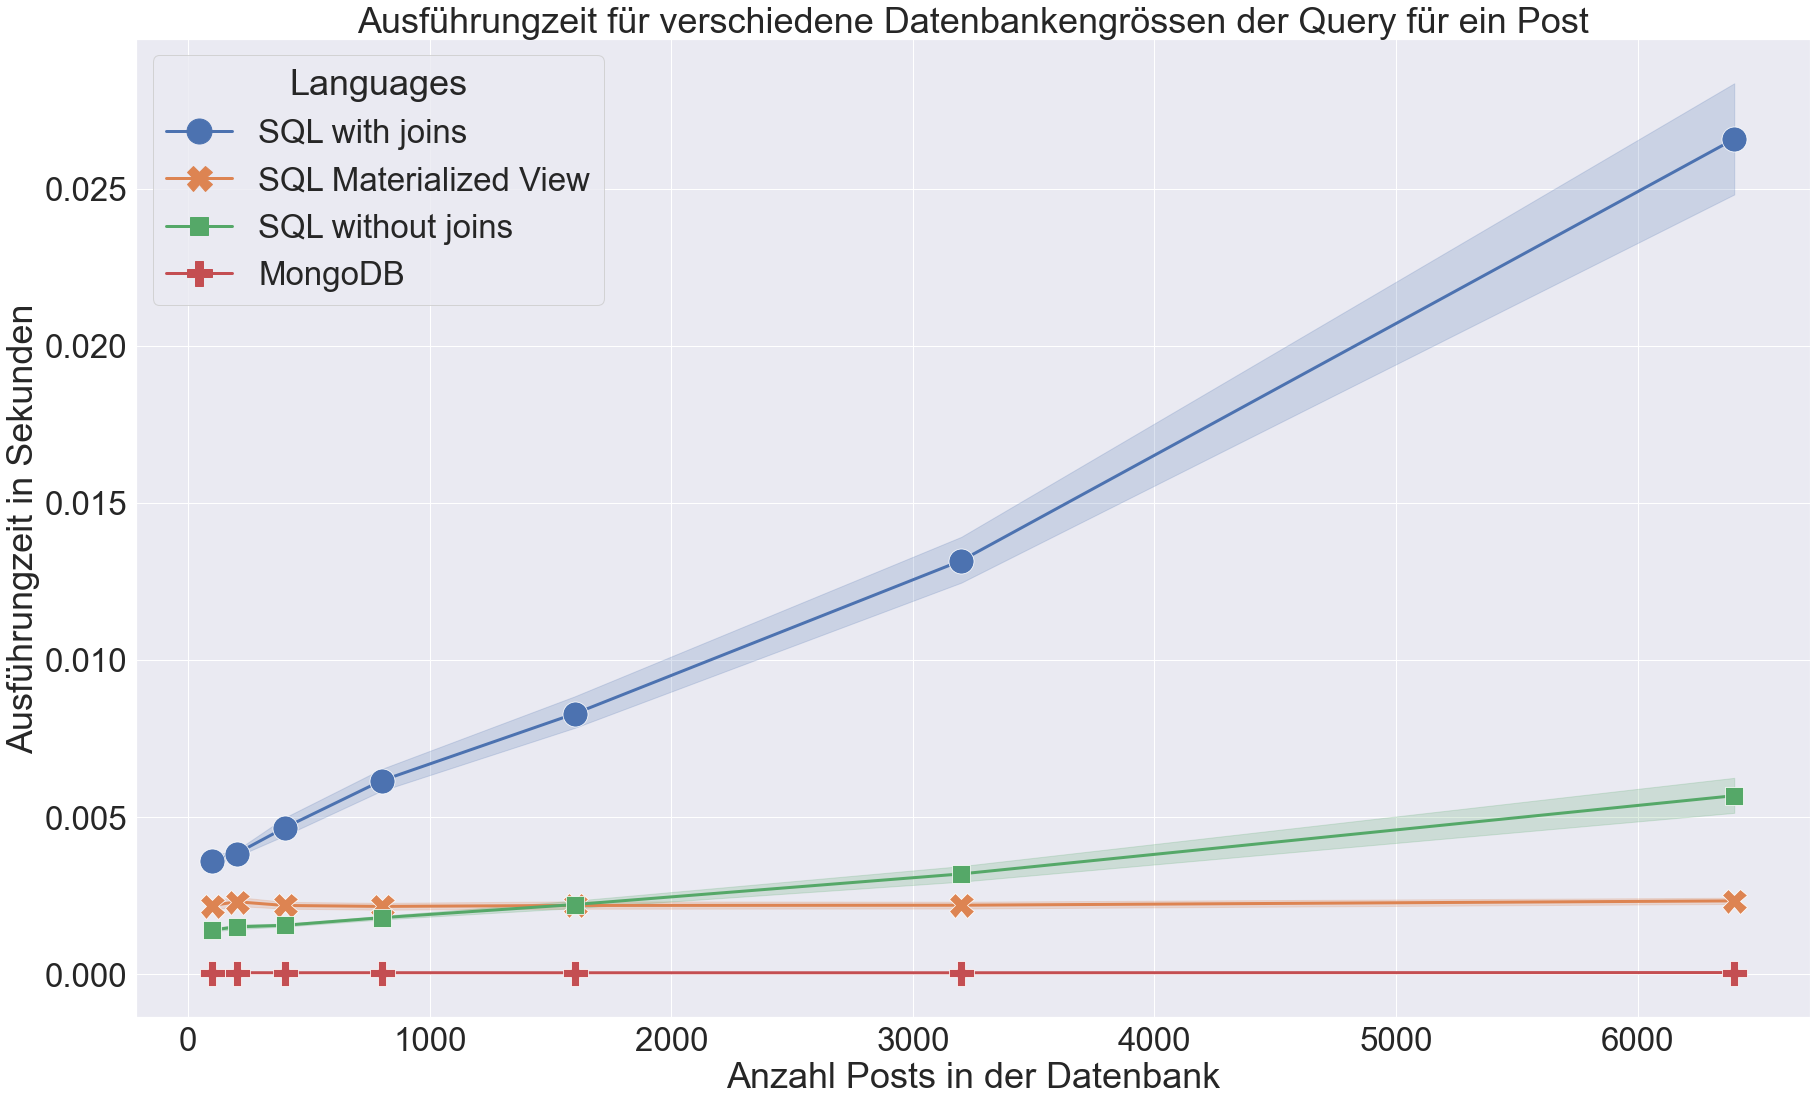

In [5]:
def show_plot(df, title):
    sns.set(rc = {'figure.figsize':(30,18), 'lines.linewidth': 3, 'lines.markersize': 25}, font_scale = 3)
    ax = sns.lineplot(x = 'posts', y = 'time', hue = 'language', data = df, style="language", markers = True, dashes = False)
    ax.set_title(title);
    ax.set_xlabel('Anzahl Posts in der Datenbank');
    ax.set_ylabel('Ausführungzeit in Sekunden');
    plt.legend(loc='upper left', title='Languages')
    plt.show()
    
show_plot(
        time[time['query'] == 'one blogpost'],
        'Ausführungzeit für verschiedene Datenbankengrössen der Query für ein Post'
    )

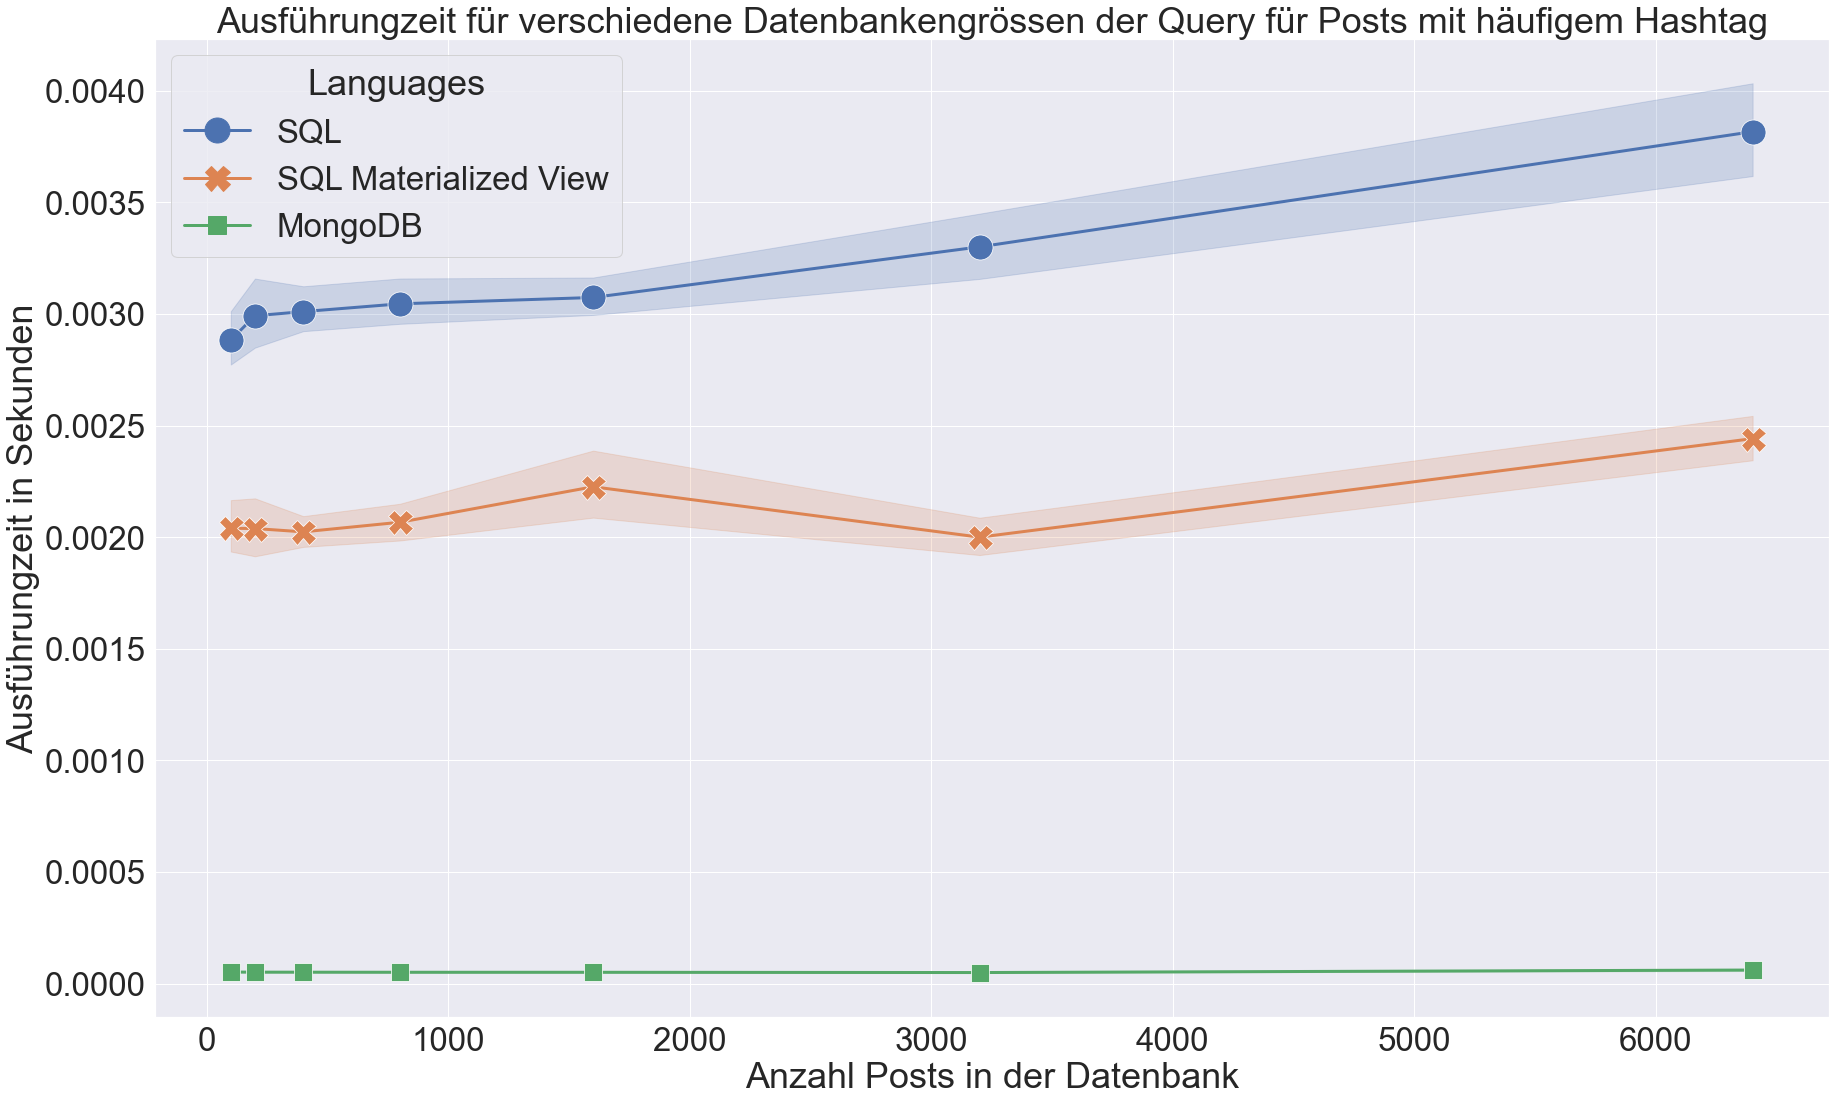

In [6]:
show_plot(
        time[time['query'] == 'by tag'],
        'Ausführungzeit für verschiedene Datenbankengrössen der Query für Posts mit häufigem Hashtag'
    )

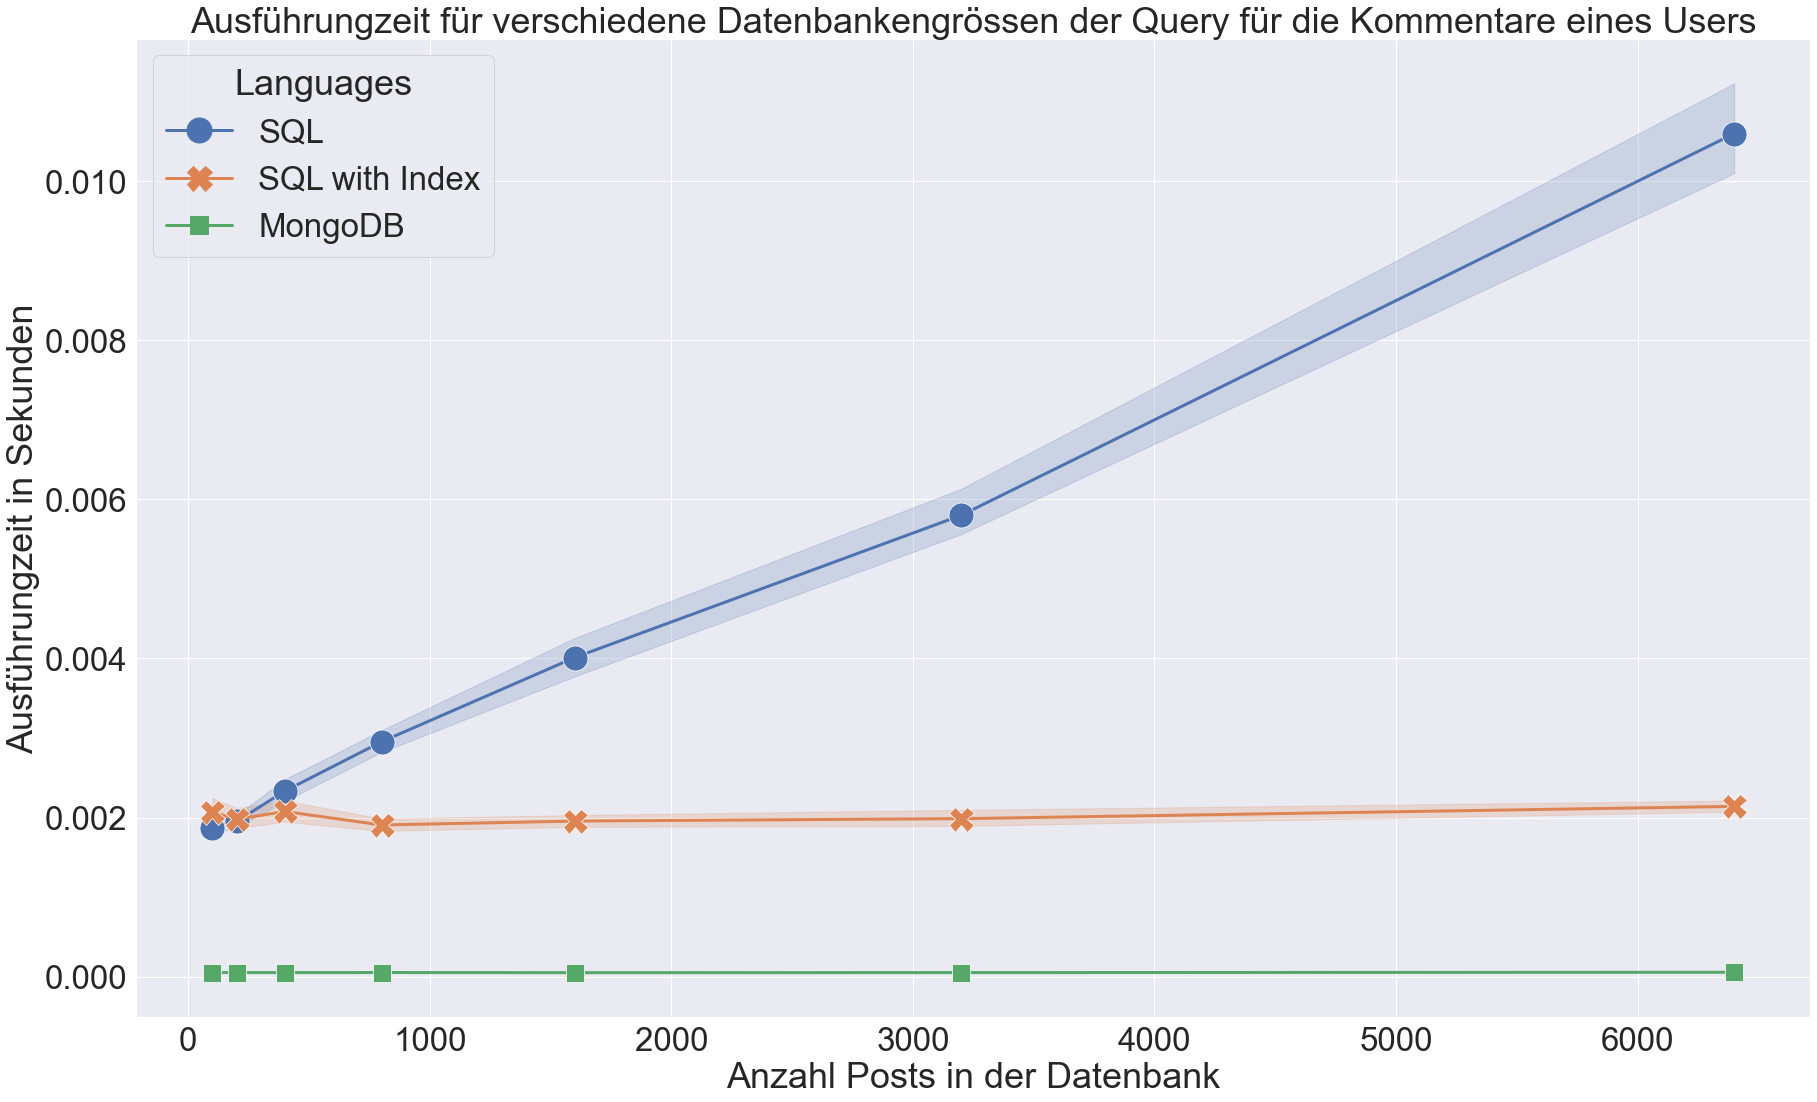

In [7]:
show_plot(
        time[time['query'] == 'by comment author'],
        'Ausführungzeit für verschiedene Datenbankengrössen der Query für die Kommentare eines Users'
    )

In [8]:
time_mongo = time[time['language'].isin(['MongoDB'])] #,'SQL with Index'

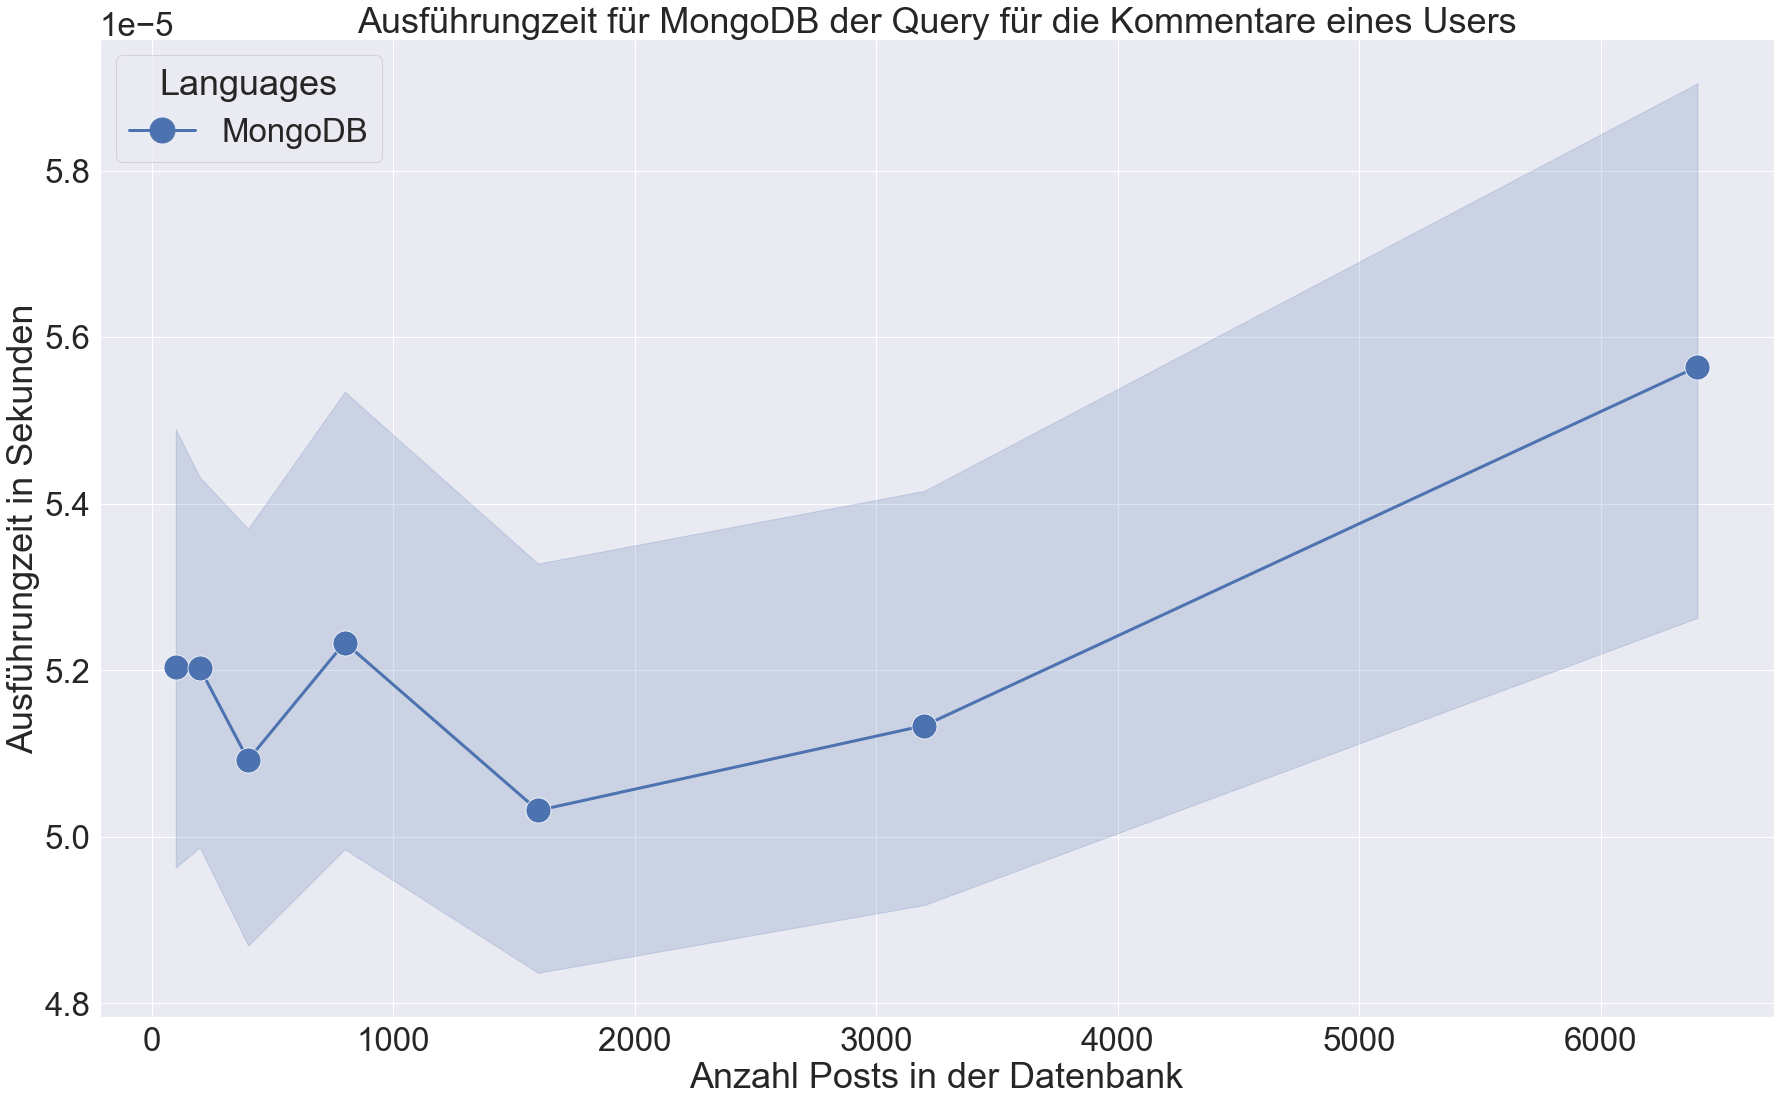

In [9]:
show_plot(
        time_mongo[time_mongo['query'] == 'by comment author'],
        'Ausführungzeit für MongoDB der Query für die Kommentare eines Users'
    )

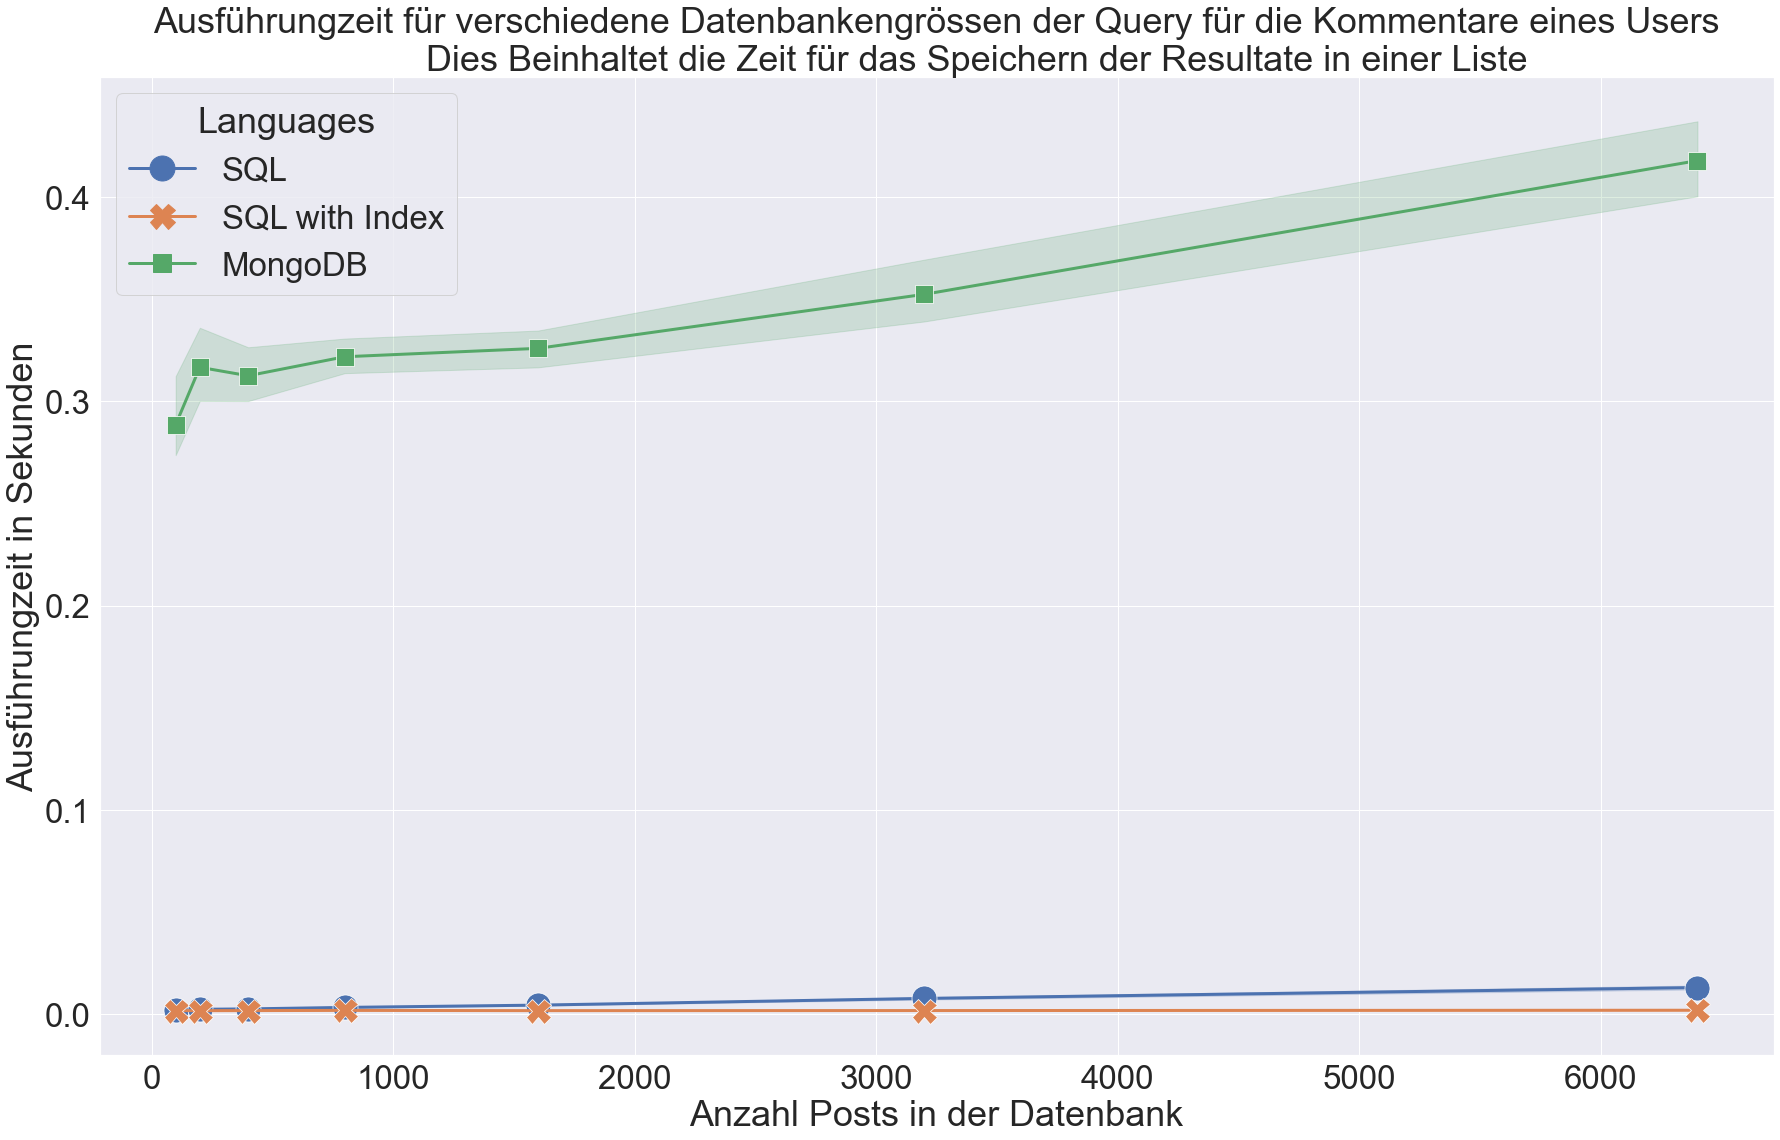

In [16]:
show_plot(
        time_df[time_df['query'] == 'by comment author'],
        '''Ausführungzeit für verschiedene Datenbankengrössen der Query für die Kommentare eines Users
        Dies Beinhaltet die Zeit für das Speichern der Resultate in einer Liste'''
    )